### Medical Price Prediction 

In the given Project we have to predict the insurance cost to make money.

Medical expenses are difficult to estimate because the most costly conditions are rare and seemingly random. Still, some conditions are more prevalent for certain segments of the population.

The goal of this analysis is to use patient data to estimate the average medical care expenses for such population segments.

In [81]:
# libraries we required to import
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [82]:
# import the data and put it in variable "Data"
Data=pd.read_csv("insurance.csv")
Data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [83]:
# Know the info of variable in data
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [84]:
# Know the data types of the variable
Data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [85]:
# To the statistics info of the data
Data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [86]:
# To know the statistics info of the categorical variable in the data
Data.describe(include="object")

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [87]:
# To know the sum of null values in the data
Data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [88]:
# To know the duplicate value in the data
Data.duplicated().sum()

1

In [89]:
# To drop the duplicate value in data
Data.drop_duplicates(inplace=True)
Data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [90]:
# To get valce_count of categorical variable
for i in Data.columns:
    if Data[i].dtype == "object":
        print(Data[i].value_counts())

sex
male      675
female    662
Name: count, dtype: int64
smoker
no     1063
yes     274
Name: count, dtype: int64
region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64


In [91]:
# Now convert categorical data into numarical data
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
for i in Data.columns:
    if Data[i].dtype=="object":
        Data[i]=lab.fit_transform(Data[i])
Data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


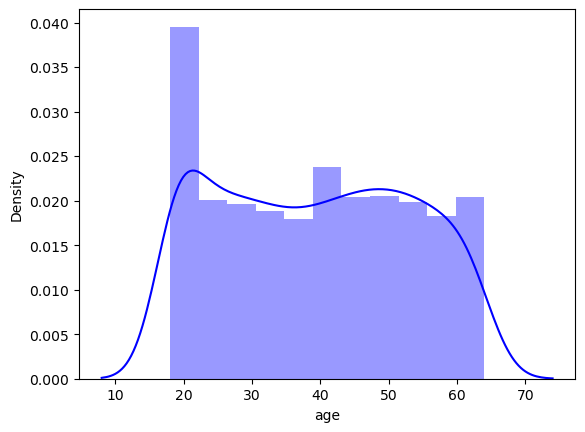

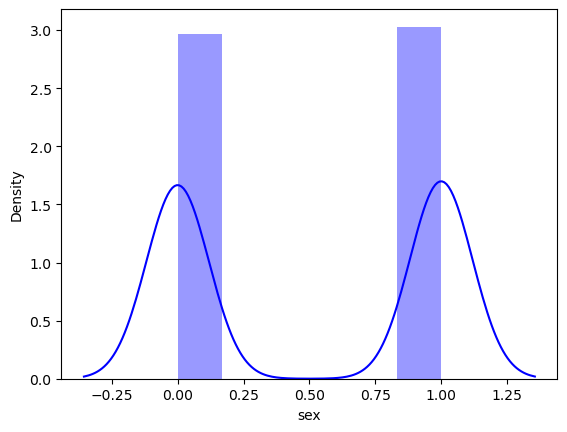

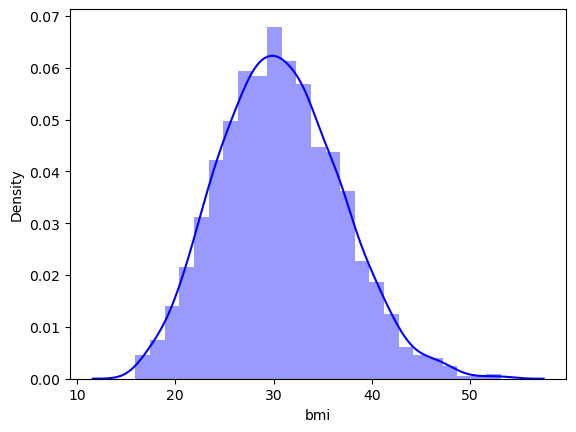

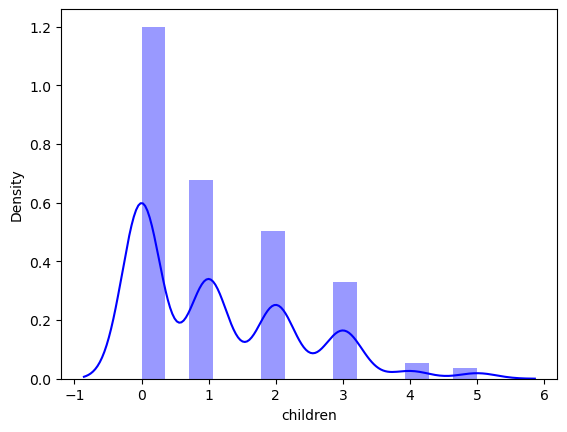

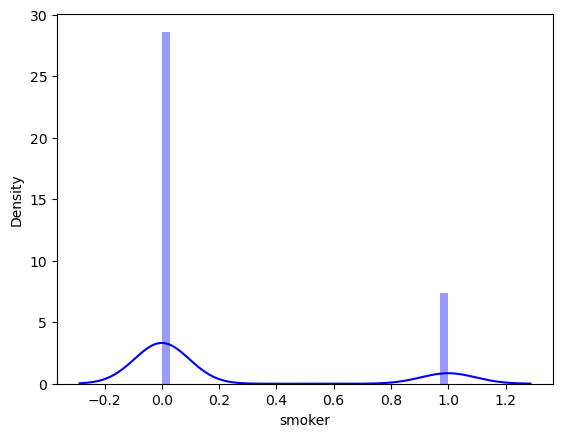

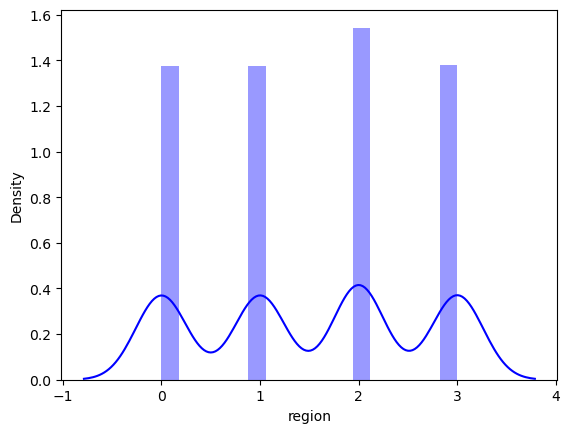

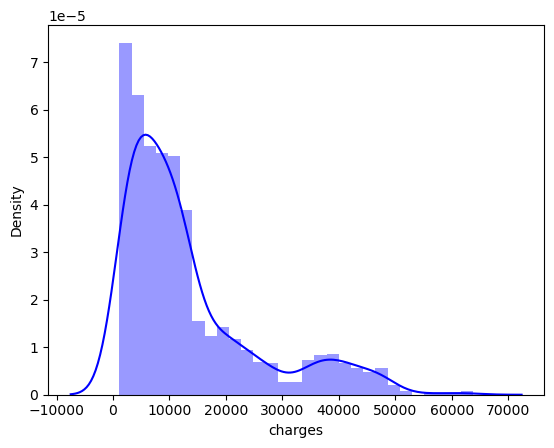

In [92]:
# See the skewness in the data
for i in Data.columns:
    sns.distplot(Data[i],color="blue")
    plt.show()

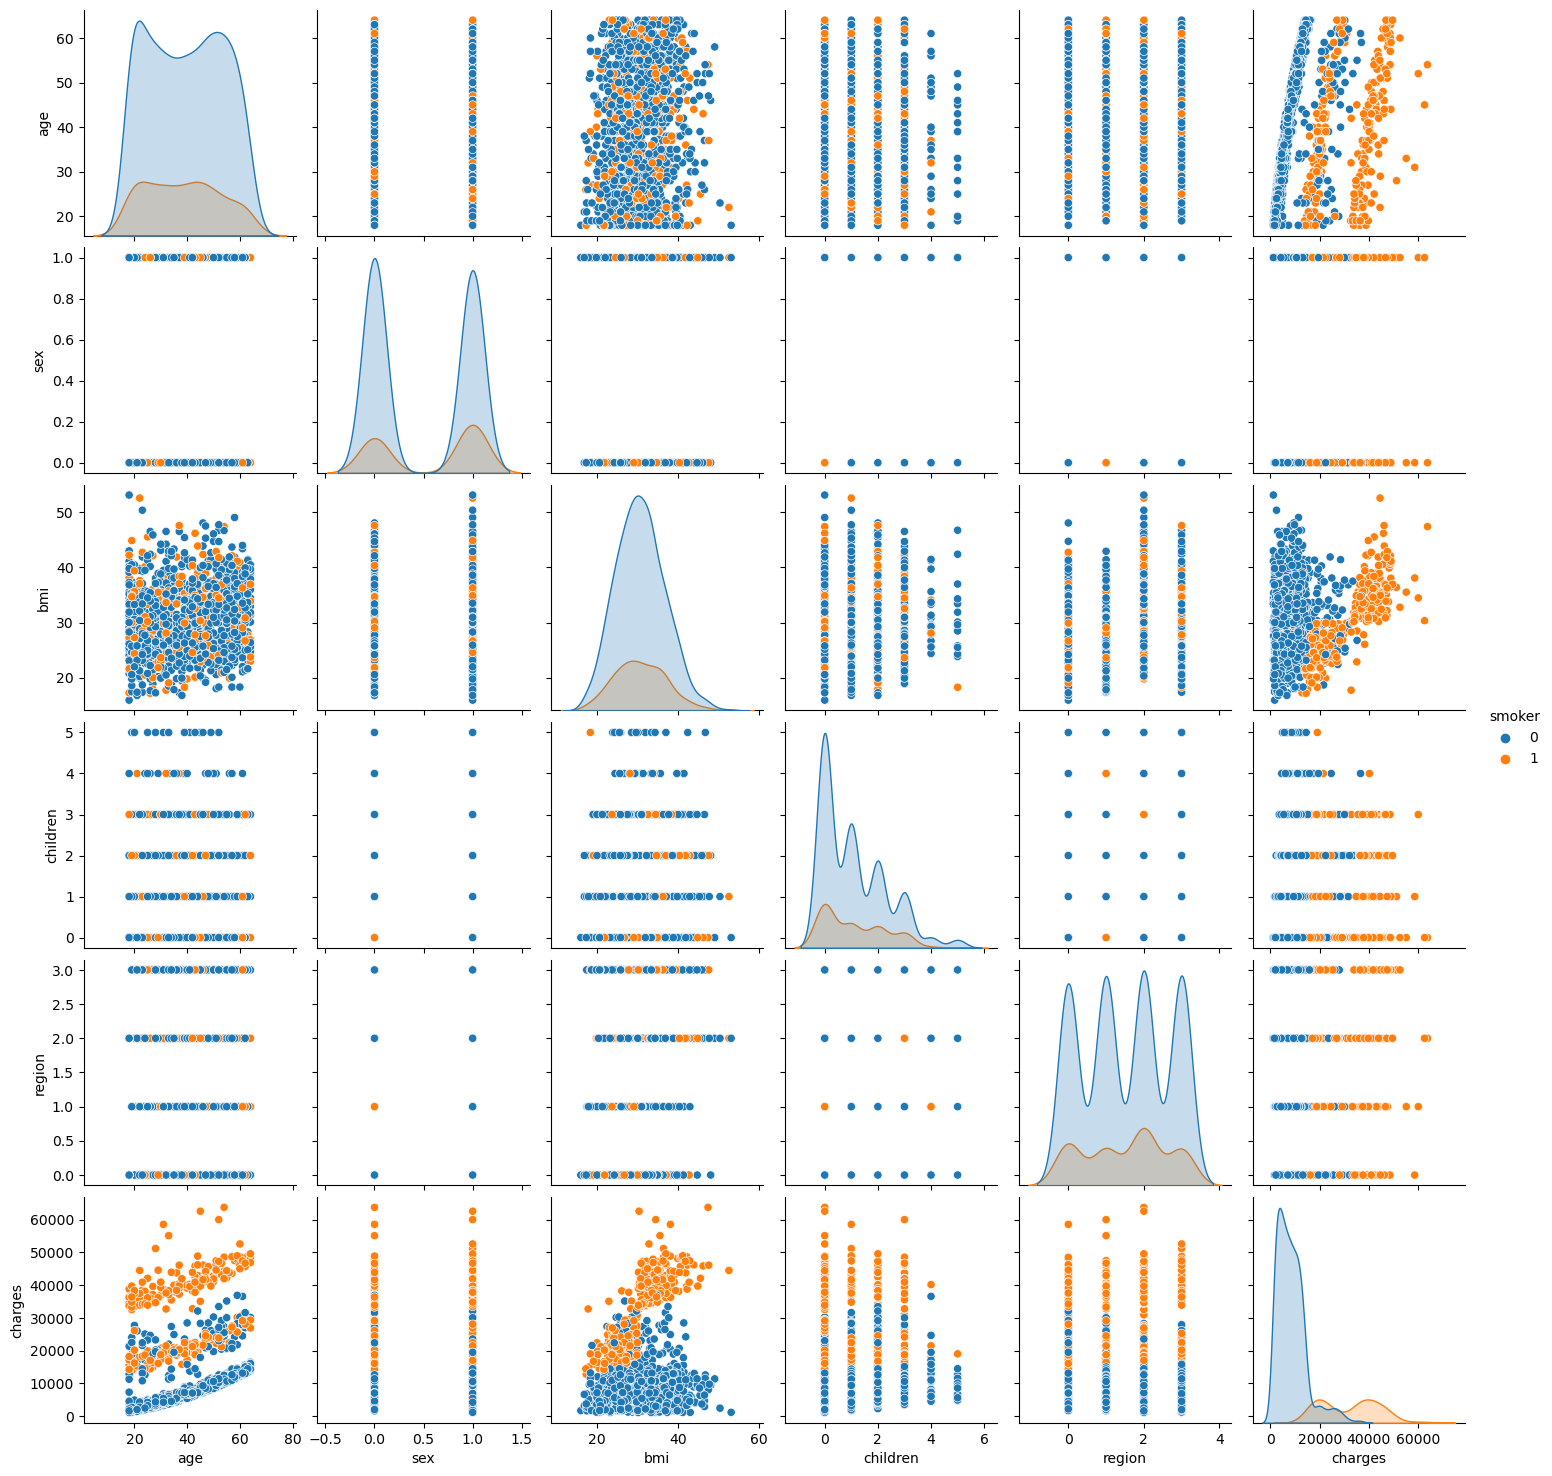

In [93]:
# To see the distibution of data we plot pairplot
sns.pairplot(data=Data,hue="smoker")

<Axes: >

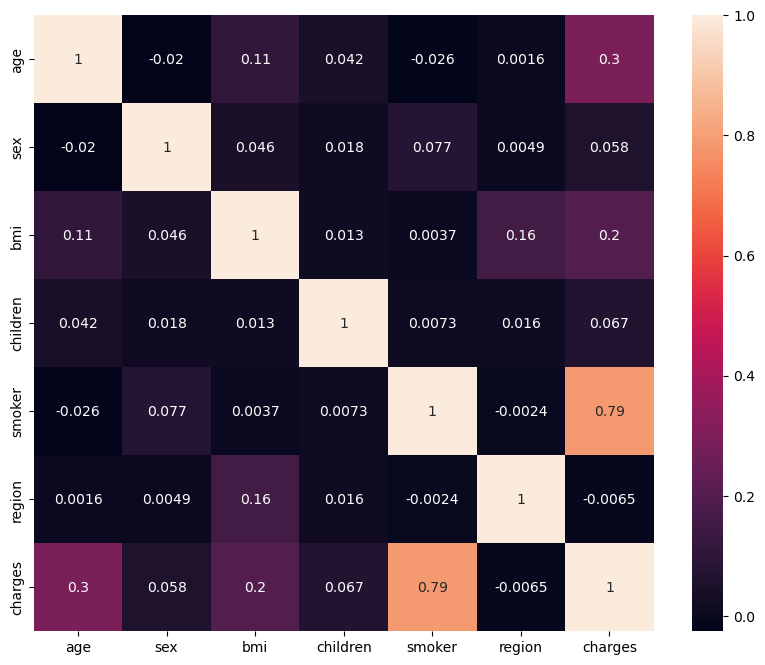

In [94]:
# Now plot the heatmap to the correlation of the data
plt.figure(figsize=(10,8))
sns.heatmap(Data.corr(),annot=True)# annot show the value of correlation 

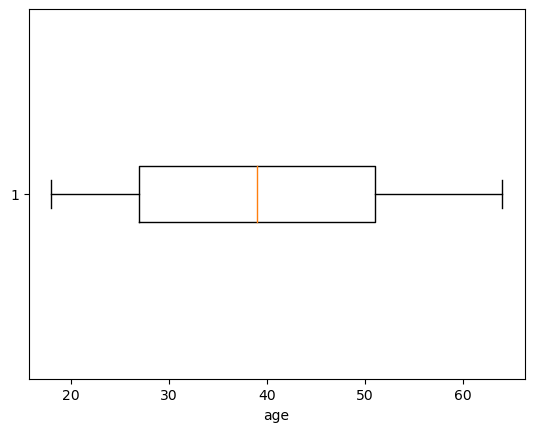

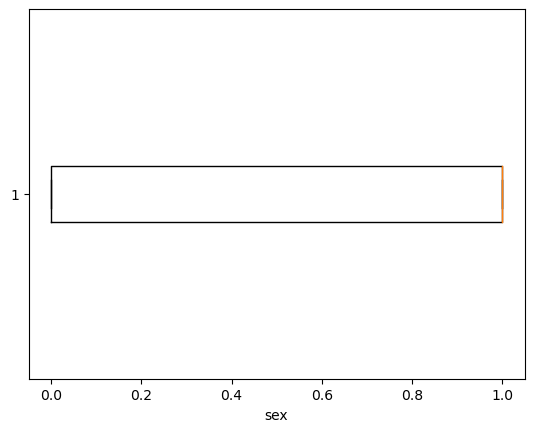

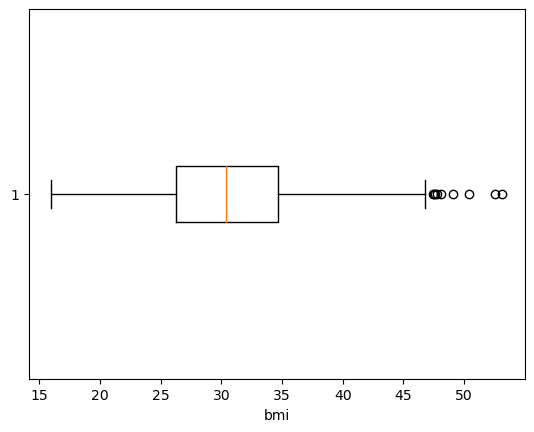

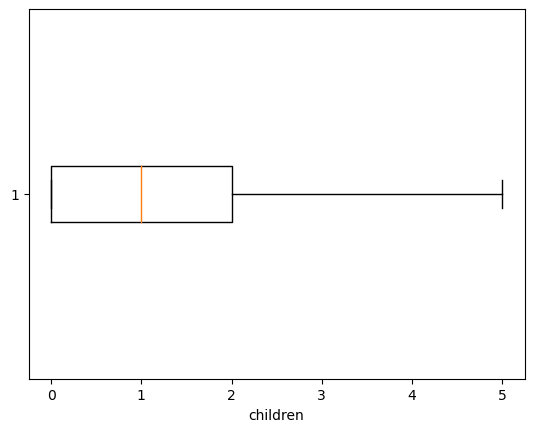

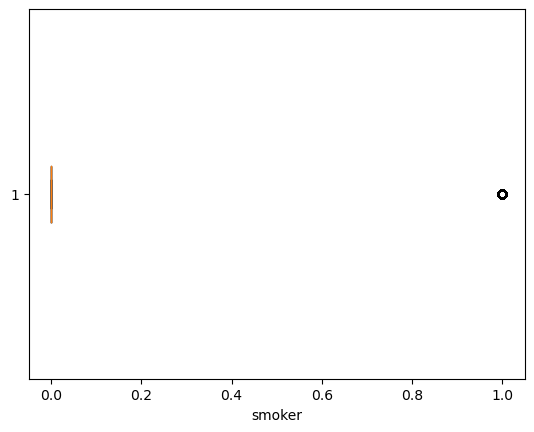

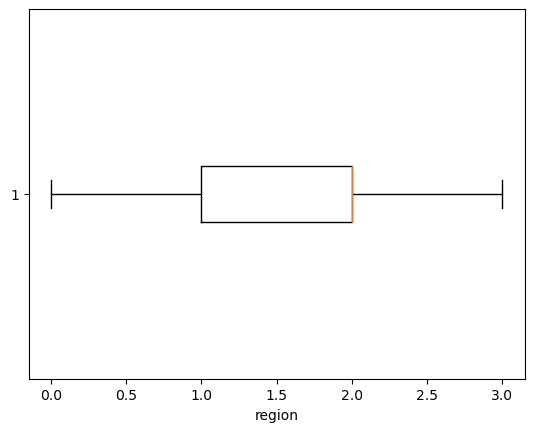

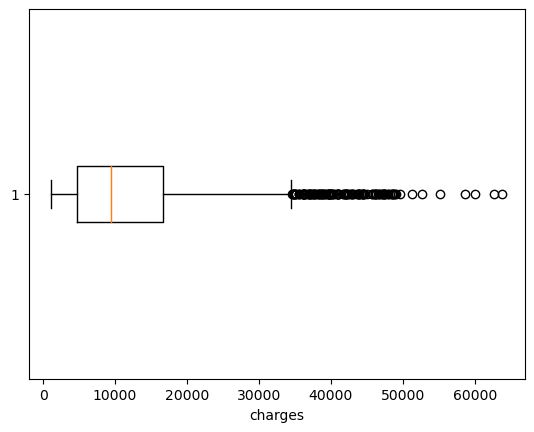

In [95]:
# Now plot the boxplot to see the outliers
for i in Data.columns:
    plt.boxplot(Data[i], vert=False) # vert false = to show the boxplot horizontally
    plt.xlabel(i)
    plt.show()

In [96]:
# Now we treat outliers with IQR method
Q1=np.quantile(Data["bmi"],0.25)
Q2=np.quantile(Data["bmi"],0.50)
Q3=np.quantile(Data["bmi"],0.75)
Q4=np.quantile(Data["bmi"],1.0)
IQR=Q3-Q1
print("IQR=",IQR)
Lower_Fence=Q1-(1.5*IQR)
Upper_Fence=Q3+(1.5*IQR)
print("Lower_Fence=",Lower_Fence)
print("Upper_Fence=",Upper_Fence)

IQR= 8.410000000000004
Lower_Fence= 13.674999999999994
Upper_Fence= 47.31500000000001


<Axes: xlabel='bmi'>

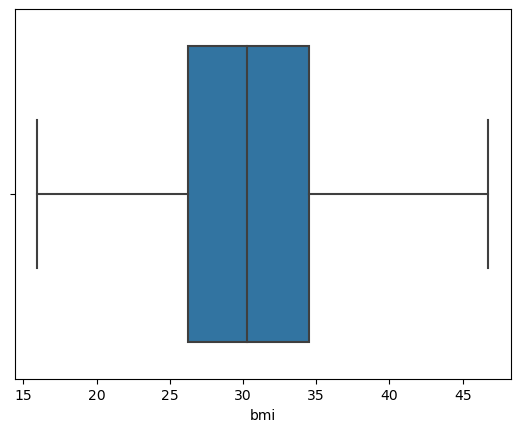

In [97]:
# Now outliers is remove from the data
df=Data.loc[(Data["bmi"]<Upper_Fence) & (Data["bmi"]>Lower_Fence)]
sns.boxplot(data=df,x="bmi")

In [119]:
# Use standard scaler for scale all variable in between -3 to 3
from sklearn.preprocessing import StandardScaler
sta=StandardScaler()
X=sta.fit_transform(Data)
print(X)

[[-1.44041773 -1.00977099 -0.45315959 ...  1.96966039  1.34316271
   0.2978567 ]
 [-1.51164747  0.99032355  0.50942165 ... -0.50770174  0.43801727
  -0.9543806 ]
 [-0.79935006  0.99032355  0.3831546  ... -0.50770174  0.43801727
  -0.72937251]
 ...
 [-1.51164747 -1.00977099  1.01448983 ... -0.50770174  0.43801727
  -0.96228744]
 [-1.29795825 -1.00977099 -0.79752426 ... -0.50770174  1.34316271
  -0.9310536 ]
 [ 1.55123139 -1.00977099 -0.26129928 ...  1.96966039 -0.46712816
   1.31029752]]


In [120]:
# Drop the divide the data in x & y, all columns in x except "charges", y take "charges" column
x=Data.drop(["charges"],axis=1)
y=Data["charges"]
print(x)

      age  sex     bmi  children  smoker  region
0      19    0  27.900         0       1       3
1      18    1  33.770         1       0       2
2      28    1  33.000         3       0       2
3      33    1  22.705         0       0       1
4      32    1  28.880         0       0       1
...   ...  ...     ...       ...     ...     ...
1333   50    1  30.970         3       0       1
1334   18    0  31.920         0       0       0
1335   18    0  36.850         0       0       2
1336   21    0  25.800         0       0       3
1337   61    0  29.070         0       1       1

[1337 rows x 6 columns]


In [121]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1337, dtype: float64


In [122]:
# Spliting data into training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,train_size=.8,random_state=20)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1069, 7), (268, 7), (1069,), (268,))

In [123]:
# let see the coefficient and Intercept
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x_train,y_train)
print("slope value are="+str(lm.coef_))
print("The intercept is="+str(lm.intercept_))

slope value are=[-1.87407342e-12 -7.27595761e-12 -9.09494702e-13  2.27373675e-12
  8.64019967e-12 -1.42108547e-12  1.21058299e+04]
The intercept is=13279.121486655946


In [124]:
# Predicting "y_pred" that is "charges" column
y_pred=lm.predict(x_test)
y_pred

array([ 3577.999   ,  1708.92575 ,  9630.397   , 12644.589   ,
        1526.312   ,  2480.9791  ,  2899.48935 ,  2261.5688  ,
       30184.9367  , 12222.8983  , 15612.19335 ,  3736.4647  ,
        6948.7008  ,  6414.178   ,  4718.20355 , 46151.1245  ,
        9715.841   ,  1704.5681  , 19749.38338 ,  3167.45585 ,
        7421.19455 ,  2523.1695  ,  4618.0799  , 18806.14547 ,
       16657.71745 ,  6746.7425  , 23244.7902  ,  6600.361   ,
       12643.3778  , 12797.20962 ,  7742.1098  , 11085.5868  ,
       30942.1918  , 37607.5277  , 19144.57652 ,  1252.407   ,
        7512.267   , 21595.38229 ,  2219.4451  ,  9549.5651  ,
       16297.846   ,  1737.376   ,  2045.68525 ,  3201.24515 ,
       14043.4767  ,  7726.854   , 11658.37915 , 48673.5588  ,
       21082.16    , 47403.88    ,  7323.734819,  1815.8759  ,
       11353.2276  ,  3471.4096  , 41919.097   ,  1880.07    ,
        7160.094   , 35147.52848 , 10435.06525 , 16085.1275  ,
       21978.6769  , 14382.70905 ,  1967.0227  , 11842.

In [126]:
# Performance Matrics 
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
rmse=(mse)**1/2
adjr2=1-(1-r2)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

print("MSE=",mse)
print("MAE=",mae)
print("R2=",r2)
print("RMSE=",rmse)
print("ADJR2=",adjr2)

MSE= 1.3656369959516145e-22
MAE= 9.148396799643177e-12
R2= 1.0
RMSE= 6.828184979758072e-23
ADJR2= 1.0


In [127]:
lm.score(x_train,y_train)

1.0

In [128]:
lm.score(x_test,y_test)

1.0

In [129]:
# Ridge resgression
from sklearn.linear_model import Ridge
rg=Ridge()
rg.fit(x_train,y_train)
print("slope value are="+str(rg.coef_))
print("The intercept is="+str(rg.intercept_))

slope value are=[ 1.23118207e+01 -4.87280538e-01  7.50036766e+00  2.39024146e+00
  3.38848542e+01 -1.51700685e+00  1.20627411e+04]
The intercept is=13279.451575194262


In [130]:
y_pred_rg=rg.predict(x_test)
y_pred_rg

array([ 3588.28910512,  1708.4674562 ,  9637.24878855, 12649.93354806,
        1531.13418061,  2497.701066  ,  2910.90250663,  2267.62636115,
       30213.53047505, 12220.98269892, 15614.79965081,  3737.92100451,
        6967.49538725,  6416.62320106,  4715.37471617, 46124.1411653 ,
        9717.84107918,  1700.26947314, 19719.0515807 ,  3155.94438125,
        7424.67651131,  2526.3313553 ,  4623.10473607, 18779.27409529,
       16695.22623434,  6751.84119716, 23278.53803683,  6606.27619493,
       12650.35750501, 12793.79609924,  7744.57845376, 11087.82218507,
       30968.18326038, 37586.73076513, 19120.72565813,  1252.14539647,
        7517.65727311, 21518.03926532,  2231.11369696,  9574.02970247,
       16328.10062206,  1732.79602549,  2044.99463685,  3219.38529637,
       14045.57052522,  7729.19266005, 11660.07838393, 48642.16579555,
       21115.64634619, 47372.81117815,  7308.00512145,  1817.14907431,
       11357.93068912,  3489.32346043, 41897.10333509,  1887.44066183,
      

In [131]:
rg.score(x_test,y_test)

0.9999974721465772

In [133]:
rg.score(x_train,y_train)

0.9999966703573634

In [134]:
from sklearn.linear_model import Lasso
las=Lasso()
las.fit(x_train,y_train)
print("slope value are="+str(las.coef_))
print("The intercept is="+str(las.intercept_))

slope value are=[ 1.32330330e-02 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.61248635e+00 -0.00000000e+00  1.21035515e+04]
The intercept is=13279.108417697274


In [135]:
y_pred_las=las.predict(x_test)
y_pred_las

array([ 3578.98156698,  1710.25160625,  9630.26214321, 12643.89627724,
        1527.67505318,  2482.16530597,  2900.59584686,  2262.79253017,
       30184.93653229, 12222.28305718, 15610.94398871,  3737.41932781,
        6949.0650015 ,  6414.63431913,  4718.97435034, 46148.1071315 ,
        9715.6872343 ,  1705.89477639, 19747.34405986,  3168.51002853,
        7421.4698249 ,  2524.34870803,  4618.86388879, 18804.27707567,
       16660.23492112,  6747.13717077, 23246.09056043,  6600.78699112,
       12642.68153486, 12796.47309162,  7742.3265616 , 11085.1780664 ,
       30942.0509968 , 37606.10509942, 19142.6444306 ,  1253.81971883,
        7512.52042151, 21592.97009026,  2220.67487297,  9549.44545633,
       16300.42177556,  1738.6974443 ,  2046.95149612,  3202.29768208,
       14042.52258206,  7727.07174768, 11657.86826843, 48670.07988809,
       21083.85418623, 47400.64099302,  7324.00392928,  1817.18634042,
       11352.77509265,  3472.41411302, 41916.87989874,  1881.36553089,
      

In [136]:
las.score(x_train,y_train)

0.9999999861758371

In [137]:
las.score(x_test,y_test)

0.9999999874324309

In [138]:
from sklearn.linear_model import ElasticNet
en=ElasticNet()
en.fit(x_train,y_train)
print("slope value are="+str(en.coef_))
print("The intercept is="+str(en.intercept_))

slope value are=[1123.83305191   38.20875966  734.43297639  245.05472576 3146.352894
 -121.37579104 6087.55734128]
The intercept is=13304.46311167541


In [139]:
y_pred_en=en.predict(x_test)
y_pred_en

array([ 6127.45233181,  3625.008252  , 10990.80789321, 13161.13948977,
        4042.90397782,  5807.00878102,  5600.12641275,  4574.64684203,
       30077.46497212, 12053.66544187, 15386.16578071,  5327.40833358,
        9844.55825211,  7745.66376402,  5722.36924397, 38353.71015871,
       10360.31297423,  3245.2543242 , 15777.70117729,  3604.27493183,
        8575.57460938,  4656.56918609,  6483.93770029, 15516.95840709,
       19418.01523107,  8380.89219099, 24567.37295563,  8377.57251763,
       13312.58737567, 12452.8691987 ,  8943.50870409, 11565.79910209,
       30333.05268049, 31699.60458556, 15879.82495788,  3323.54570833,
        9126.64349042, 13023.1123697 ,  5133.57969557, 12441.05150519,
       18696.01863886,  3141.73638841,  3890.27736916,  6522.86844084,
       13948.41056581,  8963.15734269, 11914.05445342, 39960.59499668,
       22978.47869034, 38939.24633373,  6738.18049969,  3905.6829188 ,
       12139.01163878,  6918.83661928, 35148.45533095,  4403.0124144 ,
      

In [140]:
en.score(x_test,y_test)

0.9245713660877886

In [141]:
en.score(x_train,y_train)

0.91465726478142

## Conclusion

It seems that the machine learning model has performed very well on the test set. The low values of MSE, MAE, and RMSE indicate that the model's predictions are very close to the actual values in the test set. The R-squared (R2) value of 1.0 indicates that the model has perfectly fit the test set, and the adjusted R-squared (ADJR2) value of 1.0 suggests that the model is not overfitting to the data.